In [19]:
import json
import pandas as pd

In [16]:
# Load the Twitter data from a file
with open('/Users/cmu-work/Downloads/2023-02-04_00-00-00.json', 'r') as f:
    data = [json.loads(line) for line in f]

## Examine the data structure and unpacking the json file

In [ ]:
## A reminder of the data structure
# a data is list of API call from twitter
# data[0] is one API call
# data[0]['data'] is the data from the API call
# data[0]['data'][0] is the first tweet from the API call

data[2]['data'][0].keys()

#extact 'id', 'author_id', 'lang', 'text', 'created_at' from data[2]['data'][0]
tweet_id = data[2]['data'][0]['id']
author_id = data[2]['data'][0]['author_id']
lang = data[2]['data'][0]['lang']
text = data[2]['data'][0]['text']
created_at = data[2]['data'][0]['created_at']

#print out the data
print(tweet_id, author_id, lang, text, created_at)

## extact data

In [33]:
# write a while loop to exact 'id', 'author_id', 'lang', 'text', 'created_at' from data[2]['data'] and stored in a pandas dataframe
# the dataframe should have 5 columns: 'id', 'author_id', 'lang', 'text', 'created_at'
# the dataframe should have 100 rows

# create a empty dataframe
df = pd.DataFrame(columns=['id', 'author_id', 'lang', 'text', 'created_at'])

# loop through the data
for i in range(len(data)):
    for j in range(len(data[i]['data'])):
        tweet_id = data[i]['data'][j]['id']
        author_id = data[i]['data'][j]['author_id']
        lang = data[i]['data'][j]['lang']
        text = data[i]['data'][j]['text']
        created_at = data[i]['data'][j]['created_at']
        df = df.append({'id': tweet_id, 'author_id': author_id, 'lang': lang, 'text': text, 'created_at': created_at}, ignore_index=True)

# check the dataframe
df.head()

1622009936367558657 52446867 en RT @thehill: Train derailment sparks massive fire in Ohio, prompts evacuations https://t.co/ydRyCJZVaI https://t.co/UuusngLYmL 2023-02-04T23:11:18.000Z


,id,author_id,lang,text,created_at
0,1622022183882035205,300614659,en,RT @AfricanArchives: Ida B. Wells successfully...,2023-02-04T23:59:59.000Z
1,1622022040608800768,392978157,en,Freight train cars continued to burn on Saturd...,2023-02-04T23:59:24.000Z
2,1622021853916106752,3313635276,en,50-car train derailment in Ohio causes massive...,2023-02-04T23:58:40.000Z
3,1622021815445897217,250828392,ar,@M__bestawy الخبر من عندهم بس لسه ماجابوش سيرة...,2023-02-04T23:58:31.000Z
4,1622021771166629888,1582912952780263424,en,YWN: WATCH: 50-Car Train Derailment Causes Big...,2023-02-04T23:58:20.000Z


In [34]:
# save the dataframe to a csv file
df.to_csv('tweets_feb4.csv', index=False)

In [39]:
time = data[0]['data'][0]['created_at']
#exact the date from time
date = time.split('T')[0]
date

'2023-02-04'

In [35]:
len(df)

8157

## Automating 

In [3]:

def clean_twarc_to_csv(in_path, out_path):
    # Load the Twitter data from a file
    with open(in_path, 'r') as f:
        data = [json.loads(line) for line in f]

    # create a empty dataframe
    df = pd.DataFrame(columns=['id', 'author_id', 'lang', 'text', 'created_at'])

    # loop through the data
    for i in range(len(data)):
        for j in range(len(data[i]['data'])):
            tweet_id = data[i]['data'][j]['id']
            author_id = data[i]['data'][j]['author_id']
            lang = data[i]['data'][j]['lang']
            text = data[i]['data'][j]['text']
            created_at = data[i]['data'][j]['created_at']
            df = df.append({'id': tweet_id, 'author_id': author_id, 'lang': lang, 'text': text, 'created_at': created_at}, ignore_index=True)
    
    #create a name for the output file based on the dates of the tweets
    time = data[0]['data'][0]['created_at']
    #exact the date from time
    date = time.split('T')[0]

    full_out_path = out_path + date +'_clean.csv'
    df.to_csv(full_out_path, index=False)

    return (len(df))
    
    

In [2]:
clean_twarc_to_csv('/Users/cmu-work/Downloads/2023-02-05_00-00-00.json', '/Users/cmu-work/Data/Conspiracy dataset/Ohio_Clean/')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cmu-work/Downloads/2023-02-05_00-00-00.json'

In [8]:
# get a list of path for all the json files in the folder x

import os
import glob

def get_path_list(x):
    path_list = []
    for file in glob.glob(x + "/*.json"):
        path_list.append(file)
    return path_list

# get a list of path for all the json files in the folder x
path_list = get_path_list('/Users/cmu-work/Data/Conspiracy dataset/Twitter_Ohio_Palestine')

## Get Length

In [ ]:
import json

In [9]:
def return_length(in_path):
    # Load the Twitter data from a file
    with open(in_path, 'r') as f:
        data = [json.loads(line) for line in f]

    # # create a empty dataframe
    # df = pd.DataFrame(columns=['id', 'author_id', 'lang', 'text', 'created_at'])

    # # loop through the data
    # for i in range(len(data)):
    #     for j in range(len(data[i]['data'])):
    #         tweet_id = data[i]['data'][j]['id']
    #         author_id = data[i]['data'][j]['author_id']
    #         lang = data[i]['data'][j]['lang']
    #         text = data[i]['data'][j]['text']
    #         created_at = data[i]['data'][j]['created_at']
    #         df = df.append({'id': tweet_id, 'author_id': author_id, 'lang': lang, 'text': text, 'created_at': created_at}, ignore_index=True)
    
    # #create a name for the output file based on the dates of the tweets
    time = data[0]['data'][0]['created_at']
    #exact the date from time
    date = time.split('T')[0]

    # full_out_path = out_path + date +'_clean.csv'
    # df.to_csv(full_out_path, index=False)

    return ((date,len(data)))

In [10]:
return_length('/Users/cmu-work/Data/Conspiracy dataset/Twitter_Ohio_Palestine/2023-02-04_00-00-00.json')

('2023-02-04', 83)

In [16]:
#loop through the path_list and clean the data
length_list = []
for i in range(len(path_list)):
    result = return_length(path_list[i])
    print(result)
    length_list.append(result)


('2023-02-11', 1122)
('2023-02-06', 196)
('2023-03-21', 211)
('2023-02-28', 1037)
('2023-03-18', 188)
('2023-03-25', 96)
('2023-02-15', 5181)
('2023-03-22', 178)
('2023-02-05', 34)
('2023-02-12', 2116)
('2023-03-31', 196)
('2023-02-16', 5411)
('2023-03-26', 228)
('2023-03-08', 207)
('2023-04-03', 169)
('2023-03-15', 184)
('2023-02-25', 1978)
('2023-03-02', 548)
('2023-02-18', 3976)
('2023-03-28', 182)
('2023-03-06', 351)
('2023-02-21', 2590)
('2023-03-11', 191)
('2023-02-08', 60)
('2023-03-01', 583)
('2023-02-26', 1018)
('2023-03-16', 196)
('2023-03-12', 186)
('2023-02-22', 4723)
('2023-03-05', 968)
('2023-02-23', 6112)
('2023-03-04', 443)
('2023-03-13', 688)
('2023-03-17', 176)
('2023-02-27', 909)
('2023-02-09', 324)
('2023-04-01', 128)
('2023-03-10', 257)
('2023-03-07', 319)
('2023-02-20', 2966)
('2023-03-29', 236)
('2023-02-19', 2647)
('2023-02-24', 3040)
('2023-03-03', 444)
('2023-03-14', 387)
('2023-04-02', 73)
('2023-03-09', 327)
('2023-03-27', 444)
('2023-03-30', 95)
('2023-02-1

In [17]:
import pandas as pd

In [19]:
# save the list to a csv file
df = pd.DataFrame(length_list, columns=['date', 'length'])

# save the dataframe to a csv file
df.to_csv('length_list.csv', index=False)

In [1]:
import pandas as pd
# load length_list.csv
df = pd.read_csv('length_list.csv')

In [2]:
# order the dataframe by date
df = df.sort_values(by=['date'])

In [8]:
# turn the date into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [9]:
type(df.iloc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

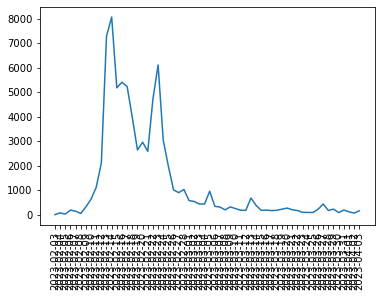

In [21]:
#visualize the data
# only show a selection of the dates on the x-axis
import matplotlib.pyplot as plt
import numpy as np

# create a list of dates
date_list = df['date'].tolist()

# create a list of length
length_list = df['length'].tolist()

# create a list of index
index_list = np.arange(len(date_list))


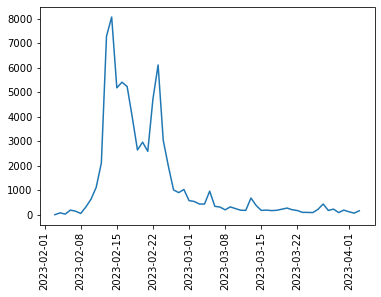

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['date'], df['length'])
plt.xticks(rotation=90)
plt.show()

In [15]:
length_list

[('2023-02-11', 1122),
 ('2023-02-06', 196),
 ('2023-03-21', 211),
 ('2023-02-28', 1037),
 ('2023-03-18', 188),
 ('2023-03-25', 96),
 ('2023-02-15', 5181),
 ('2023-03-22', 178),
 ('2023-02-05', 34),
 ('2023-02-12', 2116),
 ('2023-03-31', 196),
 ('2023-02-16', 5411),
 ('2023-03-26', 228),
 ('2023-03-08', 207),
 ('2023-04-03', 169),
 ('2023-03-15', 184),
 ('2023-02-25', 1978),
 ('2023-03-02', 548),
 ('2023-02-18', 3976),
 ('2023-03-28', 182),
 ('2023-03-06', 351),
 ('2023-02-21', 2590),
 ('2023-03-11', 191),
 ('2023-02-08', 60),
 ('2023-03-01', 583),
 ('2023-02-26', 1018),
 ('2023-03-16', 196),
 ('2023-03-12', 186)]

In [17]:
len(data)

83

In [11]:
data[0]

10

In [6]:
import json
import twarc 

In [ ]:
Feb12 = [json.loads(line) for line in open('/Users/cmu-work/Downloads/2023-02-12_00-00-00.json', 'r')]

In [ ]:
# call twarc2 flatten function 

Feb12_flatten = flatten(Feb12)


In [ ]:
len(Feb12)

In [ ]:
# read data in line by line
data = [json.loads(line) for line in open('/Users/cmu-work/Downloads/2023-02-03_00-00-00.json', 'r')]

In [ ]:
data[0].keys()

In [ ]:
data[0]['data'][0].keys()

In [ ]:
data[0]['data'][0].keys()

In [ ]:
data[0]['includes'].keys()

In [ ]:
# turn a list into a dataframe
import pandas as pd
df_t0 = pd.DataFrame(data[0]['includes']['tweets'])


In [ ]:
df_t0 

In [ ]:
data[0]['data'][0].keys()

In [ ]:
data[0]['data'][0]['possibly_sensitive']

In [ ]:
data[0]['data'][0]['text']

In [ ]:
data[0].keys()

In [ ]:
data[0]

In [ ]:
tweets = []
for line in open('/Users/cmu-work/Downloads/2023-02-03_00-00-00.json', 'r'):
    tweets.append(json.loads(line))

In [ ]:
len(tweets)

type(tweets[0])

In [ ]:
# turning twitter data into a dataframe
import pandas as pd
df = pd.DataFrame(tweets)
df.head()


In [ ]:
tweets[0].keys()
tweets[0]['includes']

In [ ]:
# find the size of the dictionary

# the first line  (1/10 the tweeter data)
tweets[0].keys()
tweets[0]['data'][0]
